In [1]:
! pwd

/Users/intaewoo/Desktop/태우의 잡것들


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
%matplotlib inline

In [21]:
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [3]:
data =pd.read_csv('서울시코로나확진자.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47961 entries, 0 to 47960
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연번      47961 non-null  int64  
 1   확진일     47961 non-null  object 
 2   환자번호    0 non-null      float64
 3   국적      0 non-null      float64
 4   환자정보    0 non-null      float64
 5   지역      47961 non-null  object 
 6   여행력     1203 non-null   object 
 7   접촉력     47961 non-null  object 
 8   조치사항    0 non-null      float64
 9   상태      47961 non-null  object 
 10  이동경로    0 non-null      float64
 11  등록일     47961 non-null  object 
 12  수정일     47961 non-null  object 
 13  노출여부    47961 non-null  object 
dtypes: float64(5), int64(1), object(8)
memory usage: 5.1+ MB


In [5]:
data.describe()

,연번,환자번호,국적,환자정보,조치사항,이동경로
count,47961.000000,0.0,0.0,0.0,0.0,0.0
mean,23981.000000,NaN,NaN,NaN,NaN,NaN
std,13845.292467,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN
25%,11991.000000,NaN,NaN,NaN,NaN,NaN
50%,23981.000000,NaN,NaN,NaN,NaN,NaN
75%,35971.000000,NaN,NaN,NaN,NaN,NaN
max,47961.000000,NaN,NaN,NaN,NaN,NaN


In [6]:
table = data.drop(columns=['환자번호','국적','환자정보','조치사항','이동경로','노출여부','등록일','수정일','여행력','상태'])

In [7]:
table

,연번,확진일,지역,접촉력
0,47961,2021.6.20,용산구,감염경로 조사중
1,47960,2021.6.20,타시도,병원 및 요양시설
2,47959,2021.6.21,타시도,타시도 확진자 접촉
3,47958,2021.6.21,마포구,타시도 확진자 접촉
4,47957,2021.6.21,관악구,감염경로 조사중
...,...,...,...,...
47956,5,2020.1.31,성북구,기타 확진자 접촉
47957,4,2020.1.30,마포구,해외유입
47958,3,2020.1.30,종로구,종로구 집단발병
47959,2,2020.1.30,중랑구,해외유입


In [11]:
table["확진일"] = pd.to_datetime(table["확진일"])

In [12]:
table['발생년']=table['확진일'].dt.year
table['발생월']=table['확진일'].dt.month
table['발생주']=table['확진일'].dt.week

/opt/anaconda3/envs/multi/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
table

,연번,확진일,지역,접촉력,발생년,발생월,발생주
0,47961,2021-06-20,용산구,감염경로 조사중,2021,6,24
1,47960,2021-06-20,타시도,병원 및 요양시설,2021,6,24
2,47959,2021-06-21,타시도,타시도 확진자 접촉,2021,6,25
3,47958,2021-06-21,마포구,타시도 확진자 접촉,2021,6,25
4,47957,2021-06-21,관악구,감염경로 조사중,2021,6,25
...,...,...,...,...,...,...,...
47956,5,2020-01-31,성북구,기타 확진자 접촉,2020,1,5
47957,4,2020-01-30,마포구,해외유입,2020,1,5
47958,3,2020-01-30,종로구,종로구 집단발병,2020,1,5
47959,2,2020-01-30,중랑구,해외유입,2020,1,5


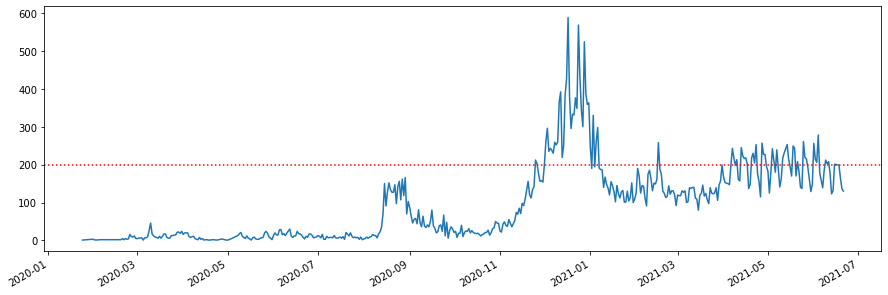

In [16]:
table["확진일"].value_counts().sort_index().plot(figsize=(15,5))
plt.axhline(200, color='red', linestyle=":")
plt.show()

In [17]:
#확진자가 가장 많은 날
day_count = table["확진일"].value_counts().sort_index()
day_count[day_count == day_count.max()]

2020-12-17    588
Name: 확진일, dtype: int64

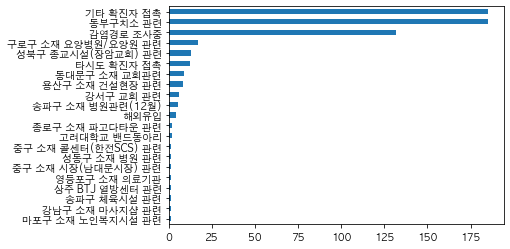

In [31]:
table[table["확진일"]=='2020-12-17']["접촉력"].value_counts().sort_values().plot.barh()
plt.show()

<AxesSubplot:xlabel='발생월'>

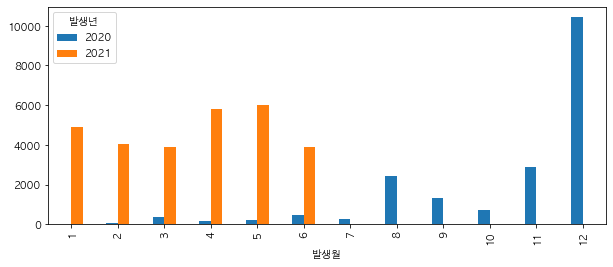

In [39]:
table.groupby(["발생월", "발생년"])["연번"].count().unstack().plot.bar(figsize=(10,4))

In [51]:
#각 날짜별 확진자수를 저장한 데이터프레임 생성
daily_case = table["확진일"].value_counts()
df_daily_case = daily_case.to_frame()
df_daily_case.columns = ["확진수"]
df_daily_case

,확진수
2020-12-17,588
2020-12-24,568
2020-12-28,524
2020-12-25,430
2020-12-16,427
...,...
2020-03-05,1
2020-04-30,1
2020-04-15,1
2020-05-01,1


In [ ]:
#거주지별 확진자 분석

In [68]:
gu = table['지역'].unique()
gu

array(['용산구', '타시도', '마포구', '관악구', '기타', '강동구', '양천구', '강북구', '강서구',
       '광진구', '강남구', '중랑구', '서초구', '동작구', '금천구', '노원구', '구로구', '영등포구',
       '송파구', '동대문구', '성북구', '서대문구', '은평구', '성동구', '도봉구', '중구', '종로구'],
      dtype=object)

In [58]:
# 공백 제거
table['지역'] = table['지역'].str.strip()
table['지역'].unique()


array(['용산구', '타시도', '마포구', '관악구', '기타', '강동구', '양천구', '강북구', '강서구',
       '광진구', '강남구', '중랑구', '서초구', '동작구', '금천구', '노원구', '구로구', '영등포구',
       '송파구', '동대문구', '성북구', '서대문구', '은평구', '성동구', '도봉구', '중구', '종로구'],
      dtype=object)

In [78]:
gu_count = table['지역'].value_counts()
gu_count

강남구     2941
송파구     2905
강서구     2289
타시도     2242
관악구     2205
노원구     2194
기타      2114
중랑구     2111
서초구     2090
은평구     2043
동작구     1991
성북구     1977
강동구     1917
영등포구    1794
동대문구    1773
양천구     1663
광진구     1590
구로구     1585
마포구     1537
도봉구     1464
강북구     1381
용산구     1326
성동구     1325
서대문구    1193
금천구      800
종로구      795
중구       716
Name: 지역, dtype: int64

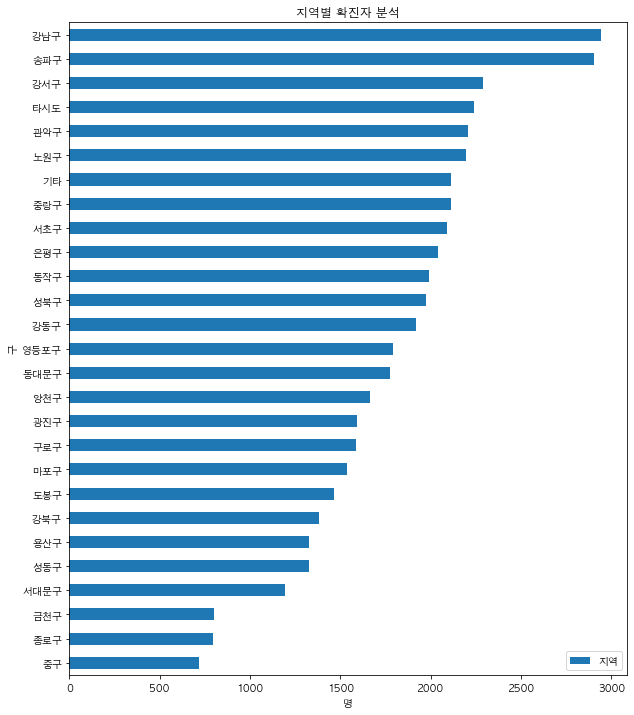

In [88]:
gu_count.sort_values().plot.barh(figsize=(10,12))
plt.legend()
plt.xlabel('명')
plt.ylabel('구')
plt.title('지역별 확진자 분석')
plt.show()

In [96]:
contact_top = table['접촉력'].value_counts().sort_values().tail(30)

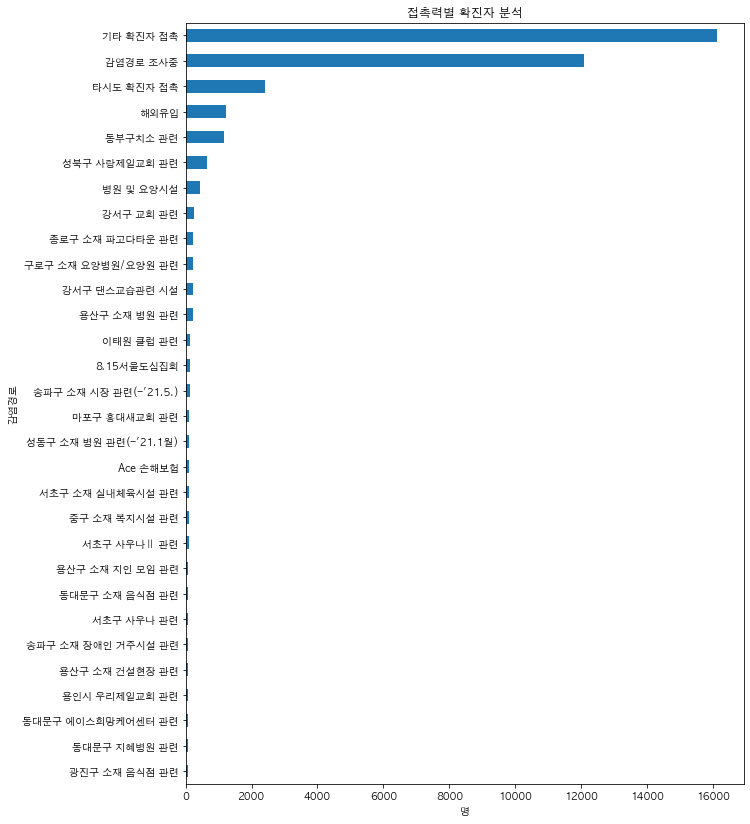

In [113]:
contact_top.plot.barh(figsize=(10,14))
plt.xlabel('명')
plt.ylabel('감염경로')
plt.title('접촉력별 확진자 분석')
plt.show()